<a href="https://colab.research.google.com/github/Davioliveira1305/Metodos-Numericos-2/blob/main/Tarefa1_2_MN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 1.2 de Metodos Numéricos 2

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import numba, warnings
%matplotlib inline


In [ ]:
# Caminho do Arquivo que se encontra no meu drive
path_to_img = "/content/drive/MyDrive/IMAGENS/naruto.png"
# Leitura da imagem e conversão para a escala de cinza
img = cv2.imread(path_to_img, cv2.IMREAD_GRAYSCALE)

A matriz relacionada a imagem tem dimensões de 508 x 338


array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 2, 2, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
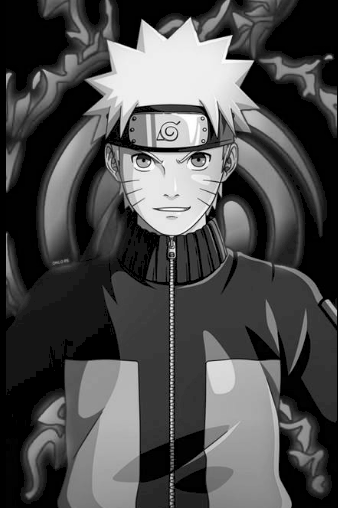

In [ ]:
print(f'A matriz relacionada a imagem tem dimensões de {img.shape[0]} x {img.shape[1]}')
img

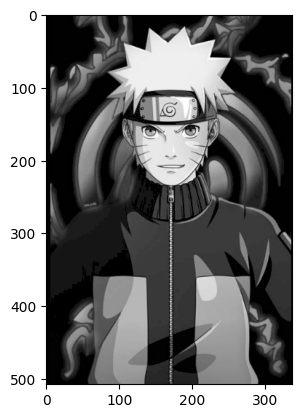

In [ ]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

Temos que inserir uma borda de zeros no eixo x e no eixo y da matriz para a passagem do filtro.

In [ ]:
img = np.insert(img, 0, 0, axis=1)
img = np.insert(img, img.shape[1], 0, axis=1)
img = np.insert(img, 0, 0, axis=0)
img = np.insert(img, img.shape[0], 0, axis=0)

In [ ]:
print(f'Nova dimensão da matriz: {img.shape[0]} x {img.shape[1]}')
print(img)

Nova dimensão da matriz: 510 x 340
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Suavização da imagem utilizando o filtro Gaussiano

In [ ]:
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def filtro_gaussiano(img):
  # Matriz para aplicar o filtro gaussiano
  gaussian = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])
  gaussian = gaussian.flatten()
  # Matriz de zeros que será a nossa nova imagem depois da aplicação do filtro gaussiano
  nova_imagem = np.zeros((img.shape[0]-2, img.shape[1]))
  for i in range(0, img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
    for j in range(0, img.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      nova_imagem[i-1][j-1] = round(np.sum(np.multiply(gaussian, piece_img.flatten()))/16)
  return nova_imagem

In [ ]:
img_gauss = filtro_gaussiano(img)

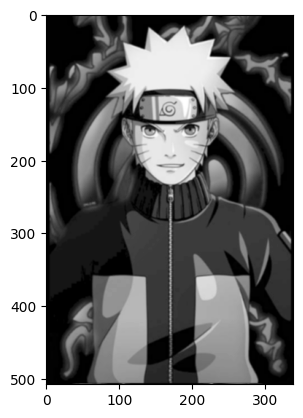

In [ ]:
plt.imshow(img_gauss, cmap='gray', vmin=0, vmax=255)

## Filtro Convulacional de Gradiente

In [ ]:
from copy import deepcopy
# Biblioteca para acelerar códigos python
@numba.jit
def mutiply(image, filter):
    return sum([image[i][j]*filter[i][j] for i in range(3) for j in range(3)])
# Biblioteca para acelerar códigos python
@numba.jit
def filter_sobel(image, fill):
    # Cria uma copia da imagem
    image_copy = deepcopy(image)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            crop_image = image[i-1:i+2, j-1:j+2]
            image_copy[i][j] = mutiply(fill, crop_image)
    return image_copy

In [ ]:

# Matriz para aplicar o filtro de Sobel na direção x
sobel_x = np.array(
  [[1, 2, 1],
  [0, 0, 0],
  [-1, -2, -1]]
)

# Matriz para aplicar o filtro de Sobel na direção y
sobel_y = np.array(
  [[1, 0, -1],
  [2, 0, -2],
  [1, 0, -1]]
)


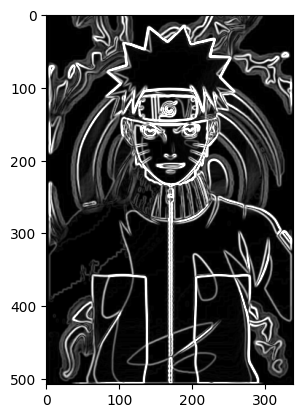

In [ ]:
gx = filter_sobel(img_gauss, sobel_x)
gy = filter_sobel(img_gauss, sobel_y)
img_sobel = (gy**2 + gx**2)**0.5
plt.imshow(img_sobel, cmap='gray', vmin=0, vmax=255)

### Tópicos 3 e 4. Escolha um valor (float)  para threshold e gere uma matriz Final, D, com  pixel 0 caso o pixel correspondente da matriz C seja menor do que o threshold pixel 1. caso o pixel correspondente da matriz C seja maior do que o threshold.


In [ ]:
import random
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def random_threshold(img):
  img_th = np.ndarray(shape=(img.shape[0], img.shape[1]), dtype=int)
  thereshold = 189.22
  for line in range(0, img.shape[0]):
    for column in range(0, img.shape[1]):
      if img[line][column] > thereshold:
        img_th[line][column] = 255
      else:
        img_th[line][column] = 0
  return img_th

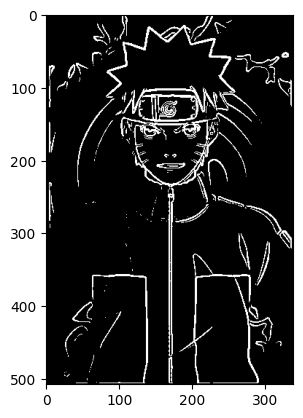

In [ ]:
plt.imshow(random_threshold(img_sobel), cmap='gray', vmin=0, vmax=255)

# Algoritmo 2

## Tópico 1. Suavize a imagem, aplicando um filtro Gaussiano

In [ ]:
img_gauss = filtro_gaussiano(img)

## Tópico 2. Na imagem do passo 1, aplique o filtro convolucional de Laplace, gerando uma imagem/matriz A


In [ ]:
import random
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def filtro_laplace(img):
  laplace = np.array(
      [[0, -1, 0],
      [-1, 4, -1],
      [0, -1, 0]]
  )

  laplace = laplace.flatten()

  img_laplace = np.ndarray(shape=(img.shape[0] - 2, img.shape[1] - 2), dtype=int)
  img_laplace.fill(0)
  for i in range(0, img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
    for j in range(0, img.shape[1]-2):
      piece_img = img[i:i+3, j:j+3]
      new_pixel = np.sum(np.multiply(laplace, piece_img.flatten()))
      new_pixel = new_pixel ** 2
      img_laplace[i-1][j-1] = round(new_pixel)
  return img_laplace

In [ ]:
img_laplace = filtro_laplace(img_gauss)

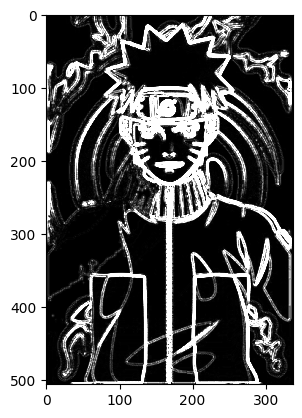

In [ ]:
plt.imshow(img_laplace, cmap='gray', vmin=0, vmax=255)

## Último Tópico
1. caso o pixel correspondente da matriz A seja diferente de 0 dentro de uma tolerância (0.0001, por exemplo)
0. cado o pixel correspondente da matriz A seja igual a 0 dentro de uma tolerância (0.0001, por exemplo).


In [ ]:
warnings.filterwarnings('ignore')
# Biblioteca para acelerar códigos python
@numba.jit
def normali(img):
  new_img = np.ndarray(shape=(img.shape[0] - 2, img.shape[1] - 2), dtype=int)
  new_img.fill(0)
  for i in range(0, img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
    for j in range(0, img.shape[1]-2):
      norma = abs(img[i][j])/255
      if norma > 0.001:
        new_img[i][j] = 255
      else:
        new_img[i][j] = 0
  return new_img

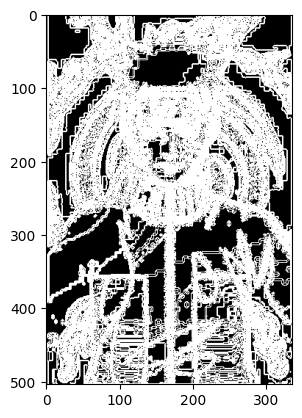

In [ ]:
plt.imshow(normali(img_laplace), cmap='gray', vmin=0, vmax=255)